In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

In [159]:
def display(*args):
    if len(args) > 1:
        _, axs = plt.subplots(1, len(args), figsize=(12, 10))
        for i, arg in enumerate(args):
            axs[i].imshow(arg, cmap='gray')
            axs[i].axis('off')
    else:
        plt.imshow(args[0], cmap='gray')
        plt.axis('off')
    plt.show()

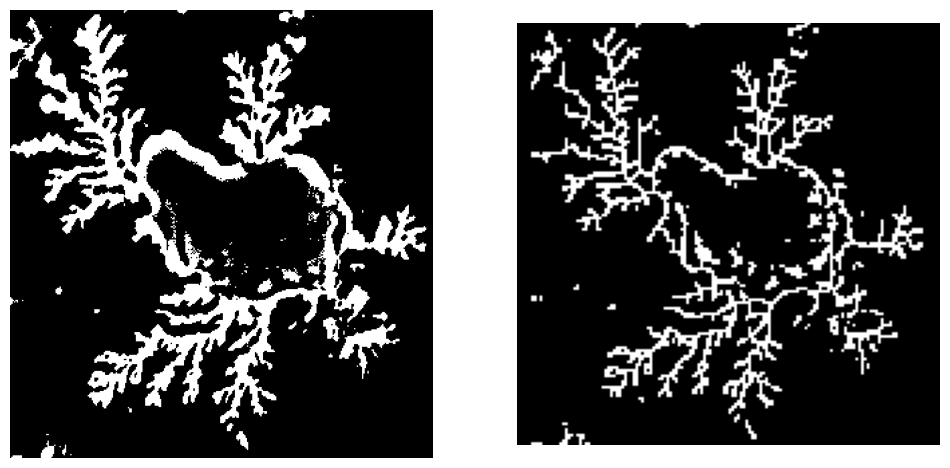

In [185]:
directory = 'Experimental Results'

n = 1
res = 150
is_black = True

mat = cv2.imread(f"{directory}/fig{n}.jpg", cv2.IMREAD_GRAYSCALE)

mat = cv2.GaussianBlur(mat, (3, 3), 0)
e, s = 1, 6
kernel = np.array([[0, -e, 0],
                   [-e, s, -e],
                   [0, -e, 0]])
mat = cv2.filter2D(mat, -1, kernel)

threshold_type = cv2.THRESH_BINARY
if is_black:
    threshold_type = cv2.THRESH_BINARY_INV
    
size = int(np.average(mat.shape)**0.5) * 2 + 1
mat = cv2.adaptiveThreshold(mat, 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, threshold_type, blockSize=size, C=10)


# skeleton creation (if needed)
skeleton = skeletonize(mat)
skeleton = skeleton.astype(np.uint8) * 255

dilation = 3
dilation_kernel = np.ones((dilation, dilation), np.uint8)
skeleton = cv2.dilate(skeleton, dilation_kernel, iterations=1)
height, width = skeleton.shape
max_dim = max(height, width)
resized = np.zeros((max_dim, max_dim), dtype=np.uint8)
pad_y = (max_dim - height) // 2
pad_x = (max_dim - width) // 2
resized[pad_y:pad_y + height, pad_x:pad_x + width] = skeleton
resized = cv2.resize(resized, (res, res), interpolation=cv2.INTER_NEAREST)
skeleton = resized

display(mat, skeleton)